In [2]:
# directory in drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
dataset_path = '/content/gdrive/My Drive/Pothole_detection_final_dataset'

Mounted at /content/gdrive


In [3]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_1910.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_2623.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_2753.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_2229.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_1190.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_3260.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_2748.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_3851.jpg
/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road/pothole_image_1657.jpg
/content/gdrive/MyDrive/Project/Pothole_detection

In [4]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [5]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
get_ipython().run_line_magic('matplotlib', 'inline')
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [6]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [7]:
#preprocess.

from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn


In [8]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from tensorflow.keras.applications.resnet50 import ResNet50

In [9]:
os.listdir('/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/')

['Normal_road', 'Pothole_road']

In [10]:
# ### Resizing the images into (256 * 256)
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label


In [11]:
X=[]
Z=[]
IMG_SIZE=256
batch_size = 10

# Normal=('MyDrive/Project/Pothole_detection_final_dataset/Pothole_road')
# Pothole=('MyDrive/Project/Pothole_detection_final_dataset/Pothole_road')
pothole = '/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road'
normal = '/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Normal_road'
#CATEGORIES = ['Normal_road','Pothole_road']

make_train_data('normal',normal)
make_train_data('pothole',pothole)




100%|██████████| 5854/5854 [03:06<00:00, 31.39it/s] 


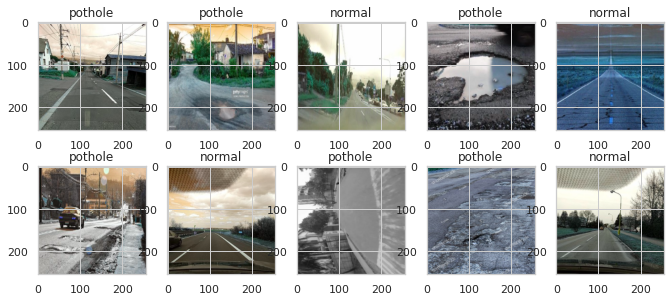

In [12]:
# ## Displaying the training data with labels
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [13]:
# ## Splitting the data into Training and Validation data
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [14]:
# ## Building the CNN model using RESNET (pretrained model)




base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
base_model.summary()


94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [15]:



model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [16]:



epochs=50
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 30,408,066
Trainable params: 30,354,946
No

In [17]:



History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))



Epoch 1/50
274/274 [==============================] - 141s 443ms/step - loss: 0.5839 - accuracy: 0.8243 - val_loss: 0.3753 - val_accuracy: 0.8908
Epoch 2/50
274/274 [==============================] - 121s 440ms/step - loss: 0.2829 - accuracy: 0.8914 - val_loss: 0.3619 - val_accuracy: 0.8963
Epoch 3/50
274/274 [==============================] - 121s 442ms/step - loss: 0.1956 - accuracy: 0.9192 - val_loss: 0.2690 - val_accuracy: 0.8908
Epoch 4/50
274/274 [==============================] - 130s 475ms/step - loss: 0.1524 - accuracy: 0.9335 - val_loss: 0.2752 - val_accuracy: 0.8936
Epoch 5/50
274/274 [==============================] - 121s 442ms/step - loss: 0.1063 - accuracy: 0.9545 - val_loss: 0.2675 - val_accuracy: 0.8898
Epoch 6/50
274/274 [==============================] - 121s 441ms/step - loss: 0.0817 - accuracy: 0.9668 - val_loss: 0.2902 - val_accuracy: 0.8922
Epoch 7/50
274/274 [==============================] - 121s 441ms/step - loss: 0.0669 - accuracy: 0.9736 - val_loss: 0.3950 -

In [18]:
# ### Saving the trained mode



model.save('pothole_detection_model/model.h5')


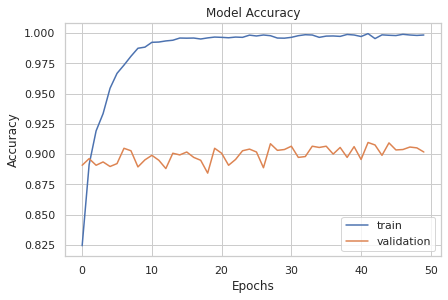

In [19]:
# ### Model Accuracy 



plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
# ## Testing the trained model
# 
# #### [0,1] --> Pothole road
# #### [1,0] --> Plain road
# #### Testing the trained model on Pothole images



path = '/content/gdrive/MyDrive/Project/Pothole_detection_final_dataset/Pothole_road'
files = os.listdir(path)
files

['pothole_image_1202.jpg',
 'pothole_image_2373.jpg',
 'pothole_image_1616.jpg',
 'pothole_image_9308.jpg',
 'pothole_image_9009.jpg',
 'pothole_image_3752.jpg',
 'pothole_image_2142.jpg',
 'pothole_image_1962.jpg',
 'pothole_image_1747.jpg',
 'pothole_image_3840.jpg',
 'pothole_image_3396.jpg',
 'pothole_image_4271.jpg',
 'pothole_image_1483.jpg',
 'pothole_image_1398.jpg',
 'pothole_image_3475.jpg',
 'pothole_image_9668.jpg',
 'pothole_image_2052.jpg',
 'pothole_image_2461.jpg',
 'pothole_image_2844.jpg',
 'pothole_image_3950.jpg',
 'pothole_image_1913.jpg',
 'pothole_image_9609.jpg',
 'pothole_image_3400.jpg',
 'pothole_image_1183.jpg',
 'pothole_image_3015.jpg',
 'pothole_image_3647.jpg',
 'pothole_image_1516.jpg',
 'pothole_image_1491.jpg',
 'pothole_image_9642.jpg',
 'pothole_image_3153.jpg',
 'pothole_image_2262.jpg',
 'pothole_image_1656.jpg',
 'pothole_image_9178.jpg',
 'pothole_image_2002.jpg',
 'pothole_image_9206.jpg',
 'pothole_image_1276.jpg',
 'pothole_image_9338.jpg',
 

In [ ]:
for i in tqdm(files):
    pth = os.path.join(path,i)
    X = cv2.imread(pth,cv2.IMREAD_COLOR)
    X = cv2.resize(X,(256,256))
    plt.figure()
    plt.imshow(X[:,:,::-1]) 
    plt.show()  

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if y_pred[0][0] == 1:
        print("Normal Road")
    else:
        print("Pothole Road")


Output hidden; open in https://colab.research.google.com to view.